# Sistem Rekomendasi Program Studi Saintek Menggunakan Teknik Conten Based Filtering dan Collaborative Filtering by Isa Aulia Almadani.



## Libraries
Tahap awal yang akan dilakukan adalah mengimpor pustaka-pustaka yang diperlukan untuk analisis data, visualisasi, dan pembelajaran mesin, serta pemrosesan teks. Ini termasuk pandas (`pd`) dan numpy (`np`) untuk manipulasi data, seaborn (`sns`) dan matplotlib (`plt`) untuk visualisasi, TensorFlow (`tf`) dan Keras (`keras`) untuk pembelajaran mesin, serta scikit-learn (`sklearn`) untuk pemrosesan teks dan pengukuran kinerja model.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tabulate import tabulate
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from pathlib import Path


## Data Loading
Data yang digunakan pada proyek ini diunduh dari platform Kaggle dengan nama Indonesia College Entrance Examination - UTBK 2019. Berdasarkan infromasi yang berasal dari sumber data, data yang dikumpulkan oleh Eko J. Salim diperoleh dari situs pemeringkatan tempat peserta ujian.  Terdapat 4 buah dataset yang ada, tetapi yang digunakan dalam pengembangan model sistem rekomendasi kali ini hanya 3 buah. Ketiga dataset, yaitu major atau jurusan, score_science atau skor saintek, dan universities.

* Data Universitas

In [ ]:
url = 'https://github.com/Symphoen1x/Dicoding_expert2/blob/main/universities.csv?raw=true'
univ = pd.read_csv(url)
univ

,Unnamed: 0,id_university,university_name
0,0,111,UNIVERSITAS SYIAH KUALA
1,1,112,UNIVERSITAS MALIKUSSALEH
2,2,113,UNIVERSITAS TEUKU UMAR
3,3,114,UNIVERSITAS SAMUDRA
4,4,115,ISBI ACEH
...,...,...,...
80,80,821,UNIVERSITAS KHAIRUN
81,81,911,UNIVERSITAS CENDERAWASIH
82,82,912,UNIVERSITAS MUSAMUS MERAUKE
83,83,913,ISBI TANAH PAPUA


* Data major


In [ ]:
url = 'https://github.com/Symphoen1x/Dicoding_expert2/blob/main/majors.csv?raw=true'

major = pd.read_csv(url)
major

,Unnamed: 0,id_major,id_university,type,major_name,capacity
0,0,1111014,111,science,PENDIDIKAN DOKTER HEWAN,88
1,1,1111022,111,science,TEKNIK SIPIL,64
2,2,1111037,111,science,TEKNIK MESIN,48
3,3,1111045,111,science,TEKNIK KIMIA,48
4,4,1111053,111,science,ARSITEKTUR,48
...,...,...,...,...,...,...
3162,3162,9212011,921,humanities,EKONOMI PEMBANGUNAN,32
3163,3163,9212042,921,humanities,MANAJEMEN,32
3164,3164,9212057,921,humanities,AKUNTANSI,32
3165,3165,9212065,921,humanities,PENDIDIKAN BAHASA INDONESIA,16


* Data Science score

In [ ]:
url = 'https://github.com/Symphoen1x/Dicoding_expert2/blob/main/score_science.csv?raw=true'

science_score = pd.read_csv(url)
science_score

,Unnamed: 0,id_first_major,id_first_university,id_second_major,id_second_university,id_user,score_bio,score_fis,score_kim,score_kmb,score_kpu,score_kua,score_mat,score_ppu
0,0,3321065,332,3331187,333,4,400,400,400,400,400,400,400,400
1,1,3211015,321,3611066,361,14,816,666,651,678,685,706,695,562
2,2,3721093,372,3551302,355,19,562,839,624,700,781,464,551,668
3,3,3321096,332,3551194,355,23,700,669,692,679,692,813,507,573
4,4,5211104,521,5211085,521,28,461,619,441,593,563,500,666,370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86565,86565,1411161,141,1421147,142,344111,516,412,376,546,523,490,549,520
86566,86566,3561262,356,3571055,357,344125,334,634,435,613,461,390,399,554
86567,86567,3531182,353,3561022,356,344127,316,717,421,474,494,483,327,554
86568,86568,1121094,112,1221095,122,344151,592,451,583,437,447,485,508,492


## Exploratory Data Analysis
Proses EDA akan dibagi menjadi banyak bagian mulai dari Dropping cololumn,chekc characteristic dataset, dan lain sebagainya sampai tahap final data. Nantinya hasil dari tahap ini akan digunakan pada tahap selanjutnya, yaitu Data Preparation.

### Dataset Universitas
Dataset ini memliki dua variabel saja, yaitu id_university dan university_name. Berikut visualisasi isinya.

#### Droping column

In [ ]:
univ = univ.drop(['Unnamed: 0'], axis=1)
univ

,id_university,university_name
0,111,UNIVERSITAS SYIAH KUALA
1,112,UNIVERSITAS MALIKUSSALEH
2,113,UNIVERSITAS TEUKU UMAR
3,114,UNIVERSITAS SAMUDRA
4,115,ISBI ACEH
...,...,...
80,821,UNIVERSITAS KHAIRUN
81,911,UNIVERSITAS CENDERAWASIH
82,912,UNIVERSITAS MUSAMUS MERAUKE
83,913,ISBI TANAH PAPUA


#### Check Characteristic Dataset
Tahap ini melibatkan pemeriksaan karakteristik atau sifat-sifat dari dataset. Ini mencakup informasi umum tentang dataset, seperti jumlah baris, tipe data dari setiap kolom, dan statistik deskriptif (misalnya, rata-rata, median, quartil, maks, min, dan standar deviasi).

In [ ]:
univ.describe()

,id_university
count,85.000000
mean,411.411765
std,230.858145
min,111.000000
25%,192.000000
50%,361.000000
75%,611.000000
max,921.000000


In [ ]:
univ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id_university    85 non-null     int64 
 1   university_name  85 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.5+ KB


#### Count Uniq Value
Tahap ini melibatkan menghitung jumlah nilai unik dalam suatu kolom atau variabel dalam dataset. Ini membantu dalam memahami variasi data dan distribusi nilai di dalamnya.

In [ ]:
print('Jumlah uniq id universitas : ', len(univ["id_university"].unique()))
print('Jumlah uniq nama universitas : ', len(univ["university_name"].unique()))

Jumlah uniq id universitas :  85
Jumlah uniq nama universitas :  85


### Dataset Program Studi
Dataset ini memliki dua variabel saja, yaitu id_university, id_major, type, major_name, dan capacity. Berikut visualisasi isinya.

#### Droping column
Tahap ini melibatkan penghapusan kolom atau variabel tertentu dari dataset. Kolom yang akan adalah sebuah kolom duplikasi dari id_univ sehingga tidak perlu digunakan secara ganda untuk tahapan analisis data.

In [ ]:
major = major.drop(['Unnamed: 0'], axis=1)
major

,id_major,id_university,type,major_name,capacity
0,1111014,111,science,PENDIDIKAN DOKTER HEWAN,88
1,1111022,111,science,TEKNIK SIPIL,64
2,1111037,111,science,TEKNIK MESIN,48
3,1111045,111,science,TEKNIK KIMIA,48
4,1111053,111,science,ARSITEKTUR,48
...,...,...,...,...,...
3162,9212011,921,humanities,EKONOMI PEMBANGUNAN,32
3163,9212042,921,humanities,MANAJEMEN,32
3164,9212057,921,humanities,AKUNTANSI,32
3165,9212065,921,humanities,PENDIDIKAN BAHASA INDONESIA,16


#### Check Characteristic Dataset
Tahap ini melibatkan pemeriksaan karakteristik atau sifat-sifat dari dataset. Ini mencakup informasi umum tentang dataset, seperti jumlah baris, tipe data dari setiap kolom, dan statistik deskriptif (misalnya, rata-rata, median, quartil, maks, min, dan standar deviasi).

In [ ]:
major.describe()

,id_major,id_university,capacity
count,3.167000e+03,3167.000000,3167.000000
mean,4.216499e+06,421.488791,51.186612
std,2.239755e+06,223.976006,34.911506
min,1.111014e+06,111.000000,6.000000
25%,3.211170e+06,321.000000,32.000000
50%,3.622257e+06,362.000000,44.000000
75%,6.121160e+06,612.000000,60.000000
max,9.212073e+06,921.000000,425.000000


In [ ]:
major.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3167 entries, 0 to 3166
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id_major       3167 non-null   int64 
 1   id_university  3167 non-null   int64 
 2   type           3167 non-null   object
 3   major_name     3167 non-null   object
 4   capacity       3167 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 123.8+ KB


#### Count Uniq Value
Tahap ini melibatkan menghitung jumlah nilai unik dalam suatu kolom atau variabel dalam dataset. Ini membantu dalam memahami variasi data dan distribusi nilai di dalamnya.

In [ ]:
print('Jumlah uniq id universitas : ', len(major["id_university"].unique()))
print('Jumlah uniq id major : ', len(major["id_major"].unique()))
print('Jumlah uniq kapasitas : ', len(major["capacity"].unique()))

Jumlah uniq id universitas :  85
Jumlah uniq id major :  3167
Jumlah uniq kapasitas :  143


### Dataset Score Science

#### Droping column
Tahap ini melibatkan penghapusan kolom atau variabel tertentu dari dataset yang kurang relevan dengan goals dan tujuan projek ini.

In [ ]:
science_score = science_score.drop(['Unnamed: 0', 'id_second_major', 'id_second_university'], axis=1)
science_score.head(5)

,id_first_major,id_first_university,id_user,score_bio,score_fis,score_kim,score_kmb,score_kpu,score_kua,score_mat,score_ppu
0,3321065,332,4,400,400,400,400,400,400,400,400
1,3211015,321,14,816,666,651,678,685,706,695,562
2,3721093,372,19,562,839,624,700,781,464,551,668
3,3321096,332,23,700,669,692,679,692,813,507,573
4,5211104,521,28,461,619,441,593,563,500,666,370


#### Renaming sample column
Memperbarui nama agar lebih setara dan rapi.

In [ ]:
science_score = science_score.rename(columns={"id_first_major" : "id_major", "id_first_university" : "id_university"})
science_score.head(5)

,id_major,id_university,id_user,score_bio,score_fis,score_kim,score_kmb,score_kpu,score_kua,score_mat,score_ppu
0,3321065,332,4,400,400,400,400,400,400,400,400
1,3211015,321,14,816,666,651,678,685,706,695,562
2,3721093,372,19,562,839,624,700,781,464,551,668
3,3321096,332,23,700,669,692,679,692,813,507,573
4,5211104,521,28,461,619,441,593,563,500,666,370


#### Count Uniq Value
Tahap ini melibatkan menghitung jumlah nilai unik dalam suatu kolom atau variabel dalam dataset. Ini membantu dalam memahami variasi data dan distribusi nilai di dalamnya.

In [ ]:
print('Jumlah uniq id universitas : ', len(science_score["id_university"].unique()))
print('Jumlah uniq id universitas : ', len(science_score["id_major"].unique()))
print('Jumlah uniq id universitas : ', len(science_score["id_user"].unique()))


Jumlah uniq id universitas :  80
Jumlah uniq id universitas :  1546
Jumlah uniq id universitas :  86570


#### Check Characteristic Dataset
Tahap ini melibatkan pemeriksaan karakteristik atau sifat-sifat dari dataset. Ini mencakup informasi umum tentang dataset, seperti jumlah baris, tipe data dari setiap kolom, dan statistik deskriptif (misalnya, rata-rata, median, quartil, maks, min, dan standar deviasi).

In [ ]:
science_score.describe()

,id_major,id_university,id_user,score_bio,score_fis,score_kim,score_kmb,score_kpu,score_kua,score_mat,score_ppu
count,8.657000e+04,86570.000000,86570.000000,86570.000000,86570.000000,86570.000000,86570.000000,86570.000000,86570.000000,86570.000000,86570.000000
mean,3.510065e+06,350.987317,177509.875523,537.140522,539.335312,544.598036,565.798094,569.942879,569.147141,529.489303,544.597158
std,1.192799e+06,119.206515,95418.883782,96.596624,102.293095,112.595368,95.166847,91.224084,111.385700,99.464651,87.436377
min,1.496000e+03,46.000000,4.000000,245.000000,252.000000,213.000000,198.000000,193.000000,266.000000,219.000000,219.000000
25%,3.311094e+06,331.000000,96827.250000,471.000000,468.000000,465.000000,500.000000,508.000000,489.000000,463.000000,487.000000
50%,3.531313e+06,353.000000,183176.500000,531.000000,531.000000,536.000000,565.000000,571.000000,563.000000,520.000000,547.000000
75%,3.721232e+06,372.000000,257122.750000,597.000000,604.000000,616.000000,632.000000,633.000000,645.000000,586.000000,604.000000
max,9.211352e+06,921.000000,344192.000000,1000.000000,1070.000000,1044.000000,908.000000,881.000000,922.000000,1123.000000,842.000000


#### Count Mean of Specific Column
Karena syarat terkait kualifikasi nilai ujian yang diminta adalah rata-rata dari beberapa tes atau ujian maka kolom baru yang berisi hasil rata-rata nilai ujian dari beberapa subtes akan dibuat. Beberapa subtes tersebut, yaitu Biologi(Bio), Fisika(Fis), Kimia(Kim), Kemampuan Membaca dan Menulis(KMB), Kemampuan Penalaran Umum(KPU), Kemampuan Kuantitatif(Kua), Matematika(Mat), dan Pengetahuan dan Pemahaman Umum(PPU).

In [ ]:
science_score['rata_rata_nilai'] = science_score[['score_bio', 'score_fis', 'score_kim', 'score_kmb',
                             'score_kpu', 'score_kua', 'score_mat', 'score_ppu']].mean(axis=1)
science_score.drop(['score_bio', 'score_fis', 'score_kim', 'score_kmb',
                'score_kpu', 'score_kua', 'score_mat', 'score_ppu'], axis=1, inplace=True)

# Menampilkan dataframe dengan rata-rata nilai baru
science_score


,id_major,id_university,id_user,rata_rata_nilai
0,3321065,332,4,400.000
1,3211015,321,14,682.375
2,3721093,372,19,648.625
3,3321096,332,23,665.625
4,5211104,521,28,526.625
...,...,...,...,...
86565,1411161,141,344111,491.500
86566,3561262,356,344125,477.500
86567,3531182,353,344127,473.250
86568,1121094,112,344151,499.375


### Merge Third Column -Dataset Final
Tahap kali ini akan dilakukan percobaan menggabungkan ketiga dataset, yaitu major, score science dan universities.

In [ ]:
merged_data = pd.merge(science_score, major, on='id_major', how='left')
merged_data = pd.merge(merged_data, univ[['id_university', 'university_name']], left_on='id_university_x', right_on='id_university', how='left')

# Hapus kolom 'id_university_x' dan 'id_university_y'
merged_data.drop(['id_university_x', 'id_university_y'], axis=1, inplace=True)
merged_data

,id_major,id_user,rata_rata_nilai,type,major_name,capacity,id_university,university_name
0,3321065,4,400.000,science,SEKOLAH ILMU & TEKNO. HAYATI - PROG. SAINS,64.0,332.0,INSTITUT TEKNOLOGI BANDUNG
1,3211015,14,682.375,science,PENDIDIKAN DOKTER,72.0,321.0,UNIVERSITAS INDONESIA
2,3721093,19,648.625,science,ILMU DAN TEKNOLOGI PANGAN,68.0,372.0,UNIVERSITAS BRAWIJAYA
3,3321096,23,665.625,science,FAKULTAS TEKNIK MESIN & DIRGANTARA (FTMD),120.0,332.0,INSTITUT TEKNOLOGI BANDUNG
4,5211104,28,526.625,science,TEKNIK PERANGKAT LUNAK (TEK. INFORMATIKA),30.0,521.0,UNIVERSITAS PALANGKARAYA
...,...,...,...,...,...,...,...,...
86565,1411161,344111,491.500,science,TEKNIK LINGKUNGAN,40.0,141.0,UNIVERSITAS ANDALAS
86566,3561262,344125,477.500,science,FARMASI,16.0,356.0,UNIVERSITAS NEGERI SEMARANG
86567,3531182,344127,473.250,science,PENDIDIKAN FISIKA,40.0,353.0,UNIVERSITAS SEBELAS MARET
86568,1121094,344151,499.375,science,AGRIBISNIS,60.0,112.0,UNIVERSITAS MALIKUSSALEH


#### Filtering Irrelevant Values
Akan dilakukan pengfilteran pada kolom yang kurang relevan dengan tujuan bisnis.

In [ ]:
# Filtering data berdasarkan nilai 'humanities' pada kolom 'type'
humanities_data = merged_data[merged_data['type'] == 'humanities']

# Mendapatkan id_major yang unik dari data humanities
id_major_humanities = humanities_data['id_major'].unique()

In [ ]:
# Filtering data untuk mendapatkan baris-baris dengan id_major yang terkait dengan 'humanities'
humanities_data = merged_data[merged_data['id_major'].isin(id_major_humanities)]

# Menampilkan DataFrame hasil filtering
print(humanities_data[['id_major', 'type']])


       id_major        type
8919    3812017  humanities
14692   3612023  humanities
27783   3612232  humanities
32162   3612023  humanities
41722   3332047  humanities


#### Removing Irrelevant Values
Menghapus kolom dari hasil pengfilteran tahap sebelumnya.

In [ ]:
# Menghapus baris yang memiliki kolom 'id_major' dan 'type'
merged_data_clean = merged_data.drop(humanities_data.index)

# Menampilkan DataFrame hasil penghapusan baris
merged_data_clean


,id_major,id_user,rata_rata_nilai,type,major_name,capacity,id_university,university_name
0,3321065,4,400.000,science,SEKOLAH ILMU & TEKNO. HAYATI - PROG. SAINS,64.0,332.0,INSTITUT TEKNOLOGI BANDUNG
1,3211015,14,682.375,science,PENDIDIKAN DOKTER,72.0,321.0,UNIVERSITAS INDONESIA
2,3721093,19,648.625,science,ILMU DAN TEKNOLOGI PANGAN,68.0,372.0,UNIVERSITAS BRAWIJAYA
3,3321096,23,665.625,science,FAKULTAS TEKNIK MESIN & DIRGANTARA (FTMD),120.0,332.0,INSTITUT TEKNOLOGI BANDUNG
4,5211104,28,526.625,science,TEKNIK PERANGKAT LUNAK (TEK. INFORMATIKA),30.0,521.0,UNIVERSITAS PALANGKARAYA
...,...,...,...,...,...,...,...,...
86565,1411161,344111,491.500,science,TEKNIK LINGKUNGAN,40.0,141.0,UNIVERSITAS ANDALAS
86566,3561262,344125,477.500,science,FARMASI,16.0,356.0,UNIVERSITAS NEGERI SEMARANG
86567,3531182,344127,473.250,science,PENDIDIKAN FISIKA,40.0,353.0,UNIVERSITAS SEBELAS MARET
86568,1121094,344151,499.375,science,AGRIBISNIS,60.0,112.0,UNIVERSITAS MALIKUSSALEH


In [ ]:
# Filtering data untuk mendapatkan baris-baris dengan id_major yang terkait dengan 'humanities'
humanities_data = merged_data_clean[merged_data_clean['id_major'].isin(id_major_humanities)]

# Menampilkan DataFrame hasil filtering
print(humanities_data[['id_major', 'type']])


Empty DataFrame
Columns: [id_major, type]
Index: []


#### Overcoming Missing Value
Setelah proses penggabungan Dataset, banyak baris yang menjadi missing value. Hal ini disebabkan adanya perbedaan baris data dari masing-masing dataset sehingga menimbulkan hilangnya beberapa baris data sehingga teridentifikasi missing value.

In [ ]:
# Cek missing value dengan fungsi isnull()
merged_data_clean.isnull().sum()

id_major           0
id_user            0
rata_rata_nilai    0
type               1
major_name         1
capacity           1
id_university      1
university_name    1
dtype: int64

<Axes: >

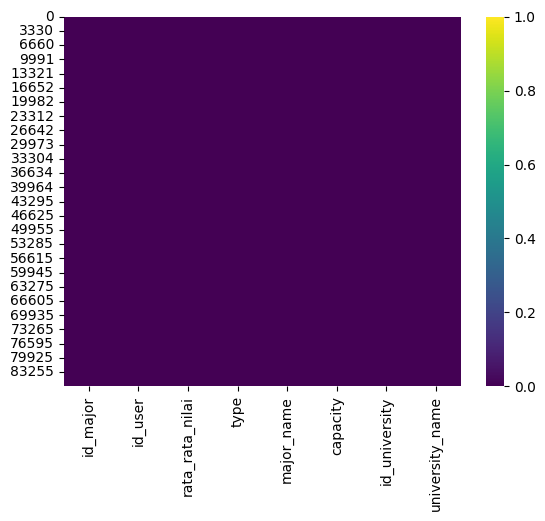

In [ ]:
sns.heatmap(merged_data_clean.isna(), cmap='viridis')


<Axes: >

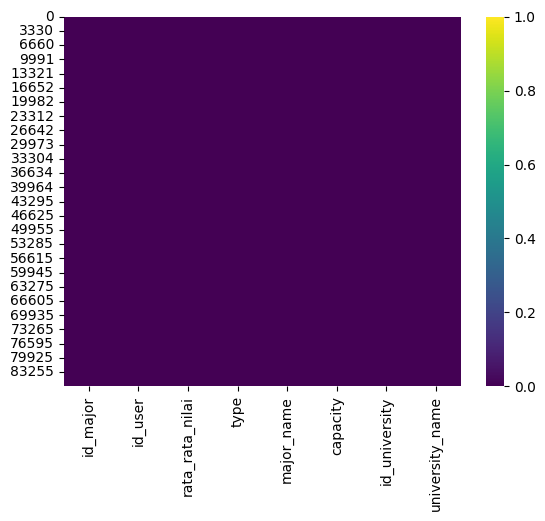

In [ ]:
sns.heatmap(merged_data_clean.isna(), cmap='viridis')


In [ ]:
# Membersihkan missing value dengan fungsi dropna()
merged_data_clean = merged_data_clean.dropna()
merged_data_clean.head()

,id_major,id_user,rata_rata_nilai,type,major_name,capacity,id_university,university_name
0,3321065,4,400.000,science,SEKOLAH ILMU & TEKNO. HAYATI - PROG. SAINS,64.0,332.0,INSTITUT TEKNOLOGI BANDUNG
1,3211015,14,682.375,science,PENDIDIKAN DOKTER,72.0,321.0,UNIVERSITAS INDONESIA
2,3721093,19,648.625,science,ILMU DAN TEKNOLOGI PANGAN,68.0,372.0,UNIVERSITAS BRAWIJAYA
3,3321096,23,665.625,science,FAKULTAS TEKNIK MESIN & DIRGANTARA (FTMD),120.0,332.0,INSTITUT TEKNOLOGI BANDUNG
4,5211104,28,526.625,science,TEKNIK PERANGKAT LUNAK (TEK. INFORMATIKA),30.0,521.0,UNIVERSITAS PALANGKARAYA


In [ ]:
merged_data_clean.isnull().sum()

id_major           0
id_user            0
rata_rata_nilai    0
type               0
major_name         0
capacity           0
id_university      0
university_name    0
dtype: int64

#### Dropping Duplicated Columns
Penghapusan kolom yang terdeteksi mengandung duplikasi baris data.

In [ ]:
preparation = merged_data_clean
preparation.sort_values('id_major')

,id_major,id_user,rata_rata_nilai,type,major_name,capacity,id_university,university_name
57713,1111014,230853,622.125,science,PENDIDIKAN DOKTER HEWAN,88.0,111.0,UNIVERSITAS SYIAH KUALA
29840,1111014,126059,593.750,science,PENDIDIKAN DOKTER HEWAN,88.0,111.0,UNIVERSITAS SYIAH KUALA
51057,1111014,210017,496.875,science,PENDIDIKAN DOKTER HEWAN,88.0,111.0,UNIVERSITAS SYIAH KUALA
60839,1111014,243688,583.750,science,PENDIDIKAN DOKTER HEWAN,88.0,111.0,UNIVERSITAS SYIAH KUALA
12093,1111014,58960,482.625,science,PENDIDIKAN DOKTER HEWAN,88.0,111.0,UNIVERSITAS SYIAH KUALA
...,...,...,...,...,...,...,...,...
12028,9211352,58711,560.375,science,TEKNIK SIPIL,16.0,921.0,UNIVERSITAS PAPUA
79980,9211352,314505,529.750,science,TEKNIK SIPIL,16.0,921.0,UNIVERSITAS PAPUA
71770,9211352,287071,433.625,science,TEKNIK SIPIL,16.0,921.0,UNIVERSITAS PAPUA
47828,9211352,200231,423.500,science,TEKNIK SIPIL,16.0,921.0,UNIVERSITAS PAPUA


In [ ]:
# Membuang data duplikat pada variabel preparation
p = preparation.drop_duplicates('id_major')
p

,id_major,id_user,rata_rata_nilai,type,major_name,capacity,id_university,university_name
0,3321065,4,400.000,science,SEKOLAH ILMU & TEKNO. HAYATI - PROG. SAINS,64.0,332.0,INSTITUT TEKNOLOGI BANDUNG
1,3211015,14,682.375,science,PENDIDIKAN DOKTER,72.0,321.0,UNIVERSITAS INDONESIA
2,3721093,19,648.625,science,ILMU DAN TEKNOLOGI PANGAN,68.0,372.0,UNIVERSITAS BRAWIJAYA
3,3321096,23,665.625,science,FAKULTAS TEKNIK MESIN & DIRGANTARA (FTMD),120.0,332.0,INSTITUT TEKNOLOGI BANDUNG
4,5211104,28,526.625,science,TEKNIK PERANGKAT LUNAK (TEK. INFORMATIKA),30.0,521.0,UNIVERSITAS PALANGKARAYA
...,...,...,...,...,...,...,...,...
83930,1141067,327724,578.250,science,PENDIDIKAN KIMIA,16.0,114.0,UNIVERSITAS SAMUDRA
83985,7531135,327926,540.375,science,ILMU KOMPUTER,56.0,753.0,UNIVERSITAS SEMBILAN BELAS NOVEMBER KOLAKA
84535,6121167,329968,535.250,science,MATEMATIKA,6.0,612.0,UNIVERSITAS PENDIDIKAN GANESHA
85153,8111134,332404,440.250,science,TEKNIK INDUSTRI,50.0,811.0,UNIVERSITAS PATTIMURA


## Data Preparation - Content Based Filtering

### Convert Series-List Data
Tujuan dari proses ini untuk mengubah bentuk data yang awalnya berbentuk dataframe menjadi berbentuk list sehingga persyaratan pada input tahap TF-IDF Vectorizer terpenuhi. Proses ini akan menggunakan fungsi `tolist().

In [ ]:
id_major = p['id_major'].tolist()
# Mengonversi data series ‘Book-Author ’ menjadi dalam bentuk list
nama_Univ = p['university_name'].tolist()

nama_Prodi = p['major_name'].tolist()

print(len(id_major))
print(len(nama_Univ))
print(len(nama_Prodi))

1541
1541
1541


### Creating a Dictionary
Tujuan dari proses ini untuk membuat dictionary dari beberapa variabel dataset final. Proses ini akan menggunakan fungsi DataFrame() sebagai alat pembuatanya.

In [ ]:
id_new = pd.DataFrame({
    'id_major': id_major,
    'university_name': nama_Univ,
    'major_name': nama_Prodi

})
id_new

,id_major,university_name,major_name
0,3321065,INSTITUT TEKNOLOGI BANDUNG,SEKOLAH ILMU & TEKNO. HAYATI - PROG. SAINS
1,3211015,UNIVERSITAS INDONESIA,PENDIDIKAN DOKTER
2,3721093,UNIVERSITAS BRAWIJAYA,ILMU DAN TEKNOLOGI PANGAN
3,3321096,INSTITUT TEKNOLOGI BANDUNG,FAKULTAS TEKNIK MESIN & DIRGANTARA (FTMD)
4,5211104,UNIVERSITAS PALANGKARAYA,TEKNIK PERANGKAT LUNAK (TEK. INFORMATIKA)
...,...,...,...
1536,1141067,UNIVERSITAS SAMUDRA,PENDIDIKAN KIMIA
1537,7531135,UNIVERSITAS SEMBILAN BELAS NOVEMBER KOLAKA,ILMU KOMPUTER
1538,6121167,UNIVERSITAS PENDIDIKAN GANESHA,MATEMATIKA
1539,8111134,UNIVERSITAS PATTIMURA,TEKNIK INDUSTRI


## Model Development -Content Based Filtering

### Check Final Dataframe

In [ ]:
data = id_new
data.sample(5)

,id_major,university_name,major_name
268,3241014,"UPN ""VETERAN"" JAKARTA",TEKNIK MESIN
1411,1121183,UNIVERSITAS MALIKUSSALEH,TEKNIK MATERIAL
1188,7211135,UNIVERSITAS SAM RATULANGI,FISIKA
1100,1161033,UNIVERSITAS ISLAM NEGERI AR-RANIRY,ARSITEKTUR
1268,1811037,UNIVERSITAS BANGKA BELITUNG,TEKNIK PERTAMBANGAN


### TF-IDF Vectorizer
Metode evaluasi ini, yang dikenal sebagai TF-IDF (Term Frequency-Inverse Document Frequency), bertujuan untuk menilai signifikansi suatu kata dalam konteks kata-kata lain dalam sebuah dokumen. Matematisnya, TF-IDF terdiri dari dua faktor: TF (Term Frequency) dan IDF (Inverse Document Frequency). TF mengukur seberapa sering sebuah kata muncul dalam sebuah teks, sementara IDF mengukur seberapa umum kata tersebut di seluruh dokumen.

In [ ]:

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data major_name
tf.fit(data['major_name'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['agribisnis', 'agro', 'agrobisnis', 'agroekoteknologi', 'agronomi',
       'agroteknologi', 'aktuaria', 'akuakultur', 'akuatik', 'alam',
       'amp', 'apoteker', 'arsitek', 'arsitektur', 'atmosfir', 'bangunan',
       'banyuwangi', 'bidan', 'bilingual', 'biokimia', 'biologi',
       'biomedik', 'biomedis', 'bioproses', 'biosistem', 'bioteknologi',
       'bisnis', 'budi', 'budidaya', 'cibiru', 'cirebon', 'dan', 'daya',
       'desain', 'dirgantara', 'dokter', 'ekonomi', 'ekowisata',
       'elektro', 'elektronika', 'energi', 'fak', 'fakultas', 'farmasi',
       'fisika', 'fisioterapi', 'fisoterapi', 'fitb', 'fmipa', 'fti',
       'ftmd', 'ftsl', 'fttm', 'ganda', 'ganesa', 'garut', 'gayo', 'geo',
       'geodesi', 'geofisika', 'geografi', 'geologi', 'geomatika', 'gigi',
       'gizi', 'glr', 'hama', 'hasil', 'hayati', 'hewan', 'higiene',
       'hortikultura', 'hutan', 'ii', 'ilmu', 'industri', 'inf',
       'informasi', 'informatika', 'instrumentasi', 'interior',
       'intern

In [ ]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(data['major_name'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(1541, 220)

In [ ]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=data.id_major
).sample(22, axis=1).sample(10, axis=0)

,geomatika,kota,pemanfaatan,tanah,teknologi,pendidikan,interior,proteksi,kebidanan,tangkap,...,keselamatan,jerman,prog,perairan,desain,pdsku,sf,sistem,kepelatihan,pertambangan
id_major,,,,,,,,,,,,,,,,,,,,,
3711365,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7211174,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3861033,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7131065,0.0,0.514249,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5421066,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1121152,0.0,0.000000,0.0,0.0,0.000000,0.512068,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5511042,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5421035,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6311016,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Cosine Similarity
Tujuan dari tahap Kesamaan cosinus adalah mengukur kesamaan antara dua vektor dan menentukan apakah mereka mengarah ke arah yang sama. Tahap kesamaan kosinus penting dalam model content-based filtering karena memberikan cara yang efektif untuk mengukur kesamaan antara dua vektor yang mewakili item-item dengan menghitung sudut kosinusnya.

In [ ]:
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.        , 0.08262126, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.08262126, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['id_major'], columns=data['id_major'])
print('Shape:', cosine_sim_df.shape)

cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (1541, 1541)


id_major,3531182,3721383,7121183,3741074,1911271
id_major,,,,,
3711117,0.000000,0.0,0.0,0.0,0.0
3811076,0.801197,0.0,0.0,0.0,0.0
3711021,0.000000,0.0,0.0,0.0,0.0
3631024,0.000000,0.0,0.0,0.0,0.0
9211247,0.000000,0.0,0.0,0.0,0.0
3611302,0.000000,0.0,0.0,0.0,0.0
3721487,0.000000,0.0,0.0,0.0,0.0
1311264,0.000000,0.0,0.0,0.0,0.0
1141102,0.000000,0.0,0.0,0.0,0.0


### Presenting Top-N Recommendation
Membuat fungsi untuk menghasilkan dataframe yang berisi 5 rekomendasi jurusan.

In [ ]:
def major_recommendations(id_major, similarity_data=cosine_sim_df, items=data[['id_major', 'university_name', 'major_name']], k=5):

    index = similarity_data.loc[:,id_major].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    closest = closest.drop(id_major, errors='ignore')


    recomen = pd.DataFrame(closest).merge(items).head(k)
    return recomen

In [ ]:
data[data.id_major.eq(3631024)]


,id_major,university_name,major_name
69,3631024,"UPN ""VETERAN"" YOGYAKARTA",TEKNIK PERTAMBANGAN


In [ ]:
major_recommendations(3631024)

,id_major,university_name,major_name
0,3221161,UNIVERSITAS ISLAM NEGERI JAKARTA,TEKNIK PERTAMBANGAN
1,5311191,UNIVERSITAS LAMBUNG MANGKURAT,TEKNIK PERTAMBANGAN
2,1111293,UNIVERSITAS SYIAH KUALA,TEKNIK PERTAMBANGAN
3,1511243,UNIVERSITAS JAMBI,TEKNIK PERTAMBANGAN
4,5411203,UNIVERSITAS MULAWARMAN,TEKNIK PERTAMBANGAN


## Data Preparation - Collaborative Filtering

### Encode Dataset
Mengubah variabel id_user dan 'id_major' menjadi list tanpa nilai dengan fungsi unique() dan tolist().

In [ ]:
# Membaca dataset
df = p
df

,id_major,id_user,rata_rata_nilai,type,major_name,capacity,id_university,university_name
0,3321065,4,400.000,science,SEKOLAH ILMU & TEKNO. HAYATI - PROG. SAINS,64.0,332.0,INSTITUT TEKNOLOGI BANDUNG
1,3211015,14,682.375,science,PENDIDIKAN DOKTER,72.0,321.0,UNIVERSITAS INDONESIA
2,3721093,19,648.625,science,ILMU DAN TEKNOLOGI PANGAN,68.0,372.0,UNIVERSITAS BRAWIJAYA
3,3321096,23,665.625,science,FAKULTAS TEKNIK MESIN & DIRGANTARA (FTMD),120.0,332.0,INSTITUT TEKNOLOGI BANDUNG
4,5211104,28,526.625,science,TEKNIK PERANGKAT LUNAK (TEK. INFORMATIKA),30.0,521.0,UNIVERSITAS PALANGKARAYA
...,...,...,...,...,...,...,...,...
83930,1141067,327724,578.250,science,PENDIDIKAN KIMIA,16.0,114.0,UNIVERSITAS SAMUDRA
83985,7531135,327926,540.375,science,ILMU KOMPUTER,56.0,753.0,UNIVERSITAS SEMBILAN BELAS NOVEMBER KOLAKA
84535,6121167,329968,535.250,science,MATEMATIKA,6.0,612.0,UNIVERSITAS PENDIDIKAN GANESHA
85153,8111134,332404,440.250,science,TEKNIK INDUSTRI,50.0,811.0,UNIVERSITAS PATTIMURA


In [ ]:

# Mengubah userID menjadi list tanpa nilai yang sama
id_peserta = df['id_user'].unique().tolist()
print('list userID: ', id_peserta)

# Melakukan encoding id_peserta
user_to_user_encoded = {x: i for i, x in enumerate(id_peserta)}
print('encoded userID : ', user_to_user_encoded)

# Melakukan proses encoding angka ke ke id_univ
user_encoded_to_user = {i: x for i, x in enumerate(id_peserta)}
print('encoded angka ke userID: ',user_encoded_to_user)

list userID:  [4, 14, 19, 23, 28, 29, 33, 37, 39, 45, 46, 49, 60, 65, 101, 110, 112, 118, 120, 133, 145, 146, 155, 156, 160, 163, 164, 172, 177, 197, 198, 199, 210, 212, 214, 232, 233, 239, 243, 244, 247, 251, 253, 255, 266, 269, 270, 277, 281, 282, 284, 292, 294, 295, 299, 304, 323, 335, 351, 364, 365, 379, 406, 408, 424, 430, 433, 438, 451, 452, 459, 460, 462, 463, 467, 470, 473, 475, 476, 477, 478, 483, 491, 503, 509, 516, 531, 534, 544, 561, 566, 575, 579, 585, 594, 595, 598, 606, 609, 641, 646, 657, 662, 663, 666, 672, 676, 680, 695, 711, 712, 717, 719, 724, 727, 734, 742, 764, 767, 771, 777, 797, 806, 808, 813, 827, 835, 839, 852, 855, 856, 875, 879, 883, 889, 891, 893, 899, 904, 908, 912, 918, 928, 929, 931, 950, 958, 965, 966, 967, 970, 974, 981, 992, 1003, 1009, 1015, 1017, 1020, 1029, 1034, 1035, 1048, 1049, 1061, 1062, 1065, 1068, 1069, 1074, 1077, 1078, 1082, 1092, 1095, 1097, 1103, 1104, 1105, 1111, 1113, 1140, 1141, 1142, 1145, 1148, 1156, 1158, 1160, 1166, 1179, 1180, 12

In [ ]:

# Mengubah userID menjadi list tanpa nilai yang sama
code_prodi = df['id_major'].unique().tolist()
print('list userID: ', code_prodi)

# Melakukan encoding code_prodi
prodi_to_prodi_encoded = {x: i for i, x in enumerate(code_prodi)}
print('encoded userID : ', prodi_to_prodi_encoded)

# Melakukan proses encoding angka ke ke code_prodi
prodi_encoded_to_prodi = {i: x for i, x in enumerate(code_prodi)}
print('encoded angka ke userID: ', prodi_encoded_to_prodi)

list userID:  [3321065, 3211015, 3721093, 3321096, 5211104, 6111014, 3411041, 3531031, 7111196, 7111076, 7111343, 3211313, 7111424, 3321081, 3331284, 3551027, 1121113, 3211271, 3331214, 9111053, 7111366, 3321073, 7111382, 3531201, 3211104, 3811014, 6111022, 3221064, 3321026, 3551051, 3631047, 3821202, 6111045, 3221072, 6111142, 3211201, 3721182, 3531085, 3531077, 3821256, 3821144, 3811037, 6111173, 3821272, 3721216, 3811045, 3551356, 3321042, 3551291, 3711133, 3821032, 3211077, 3111061, 3321011, 7131065, 3551012, 1911077, 3551221, 3711083, 1211062, 3111053, 3731114, 3321107, 3411273, 3621165, 7111014, 6111134, 1411184, 3221095, 3631024, 7121055, 3821024, 3811165, 3621432, 3571086, 3851062, 7111092, 3411226, 3411265, 3211054, 3611043, 3311094, 3551155, 5411184, 3821217, 7111181, 3851031, 3731211, 3411412, 1311032, 3621014, 7511212, 3811092, 3231074, 1911031, 3811142, 3821105, 3511227, 3331125, 3611244, 3611035, 3511107, 3241045, 3611484, 3211135, 3341232, 3231101, 3631136, 3331021, 3611

### Mapping Features
Selanjutnya, kedua variabel tadi akan disimpan ke variabel user dan prodi dan dilakukan pemetaan ke dataframe yang berkaitan.

In [ ]:
df['user'] = df['id_user'].map(user_to_user_encoded)

df['prodi'] = df['id_major'].map(prodi_to_prodi_encoded)

<ipython-input-46-0e9417229375>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['user'] = df['id_user'].map(user_to_user_encoded)
<ipython-input-46-0e9417229375>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prodi'] = df['id_major'].map(prodi_to_prodi_encoded)


In [ ]:
# Mendapatkan jumlah iser
num_user = len(user_to_user_encoded)
print(num_user)

# Mendapatkan jumlah prodi
num_prodi = len(prodi_encoded_to_prodi)
print(num_prodi)

# Nilai minimum hasil rata-rata nilai tes mahasiswa
min_nilai_mah = min(df['rata_rata_nilai'])

# Nilai maksimal hasil rata-rata nilai tes mahasiswa
max_nilai_mah = max(df['rata_rata_nilai'])

print('Number of user: {}, Number of prodi: {}, Min nilai hasil rata-rata tes: {}, Max nilai hasil rata-rata tes : {}'.format(
    num_user, num_prodi, min_nilai_mah, max_nilai_mah
))

1541
1541
Number of user: 1541, Number of prodi: 1541, Min nilai hasil rata-rata tes: 393.125, Max nilai hasil rata-rata tes : 758.0


### Split Data Training and Validation
Data dalam dataframe `df` diacak dan dipisahkan menjadi fitur x (kolom 'user' dan 'prodi') dan target y (kolom 'rata_rata_nilai'). Nilai 'rata_rata_nilai' dinormalisasi ke rentang 0-1. Data kemudian dibagi menjadi 80% data latih dan 20% data validasi untuk digunakan dalam proses pelatihan model.

In [ ]:
df = df.sample(frac=1, random_state=42)
df

,id_major,id_user,rata_rata_nilai,type,major_name,capacity,id_university,university_name,user,prodi
70331,1121152,281836,483.250,science,PENDIDIKAN TEKNIK MESIN,32.0,356.0,UNIVERSITAS NEGERI SEMARANG,1491,1491
16541,1311055,78509,537.000,science,MANAJEMEN SUMBERDAYA PERAIRAN,48.0,131.0,UNIVERSITAS RIAU,1155,1155
29765,5411257,125743,486.875,science,TEKNIK KIMIA,25.0,541.0,UNIVERSITAS MULAWARMAN,1252,1252
1077,3731122,6556,556.500,science,FISIKA,60.0,373.0,UNIVERSITAS NEGERI MALANG,561,561
12561,1411281,60876,476.000,science,PROTEKSI TANAMAN,40.0,141.0,UNIVERSITAS ANDALAS,1097,1097
...,...,...,...,...,...,...,...,...,...,...
14933,7311264,70929,450.125,science,GIZI,53.0,731.0,UNIVERSITAS TADULAKO,1130,1130
38491,6211255,162538,547.000,science,BUDIDAYA PERAIRAN,50.0,621.0,UNIVERSITAS MATARAM,1294,1294
3373,5311392,17086,501.750,science,PENDIDIKAN ILMU KOMPUTER,18.0,531.0,UNIVERSITAS LAMBUNG MANGKURAT,860,860
62448,1611213,249928,520.125,science,STATISTIKA,20.0,161.0,UNIVERSITAS BENGKULU,1459,1459


In [ ]:
x = df[['user', 'prodi']].values

y = df['rata_rata_nilai'].apply(lambda x: (x - min_nilai_mah) / (max_nilai_mah - min_nilai_mah)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[1491 1491]
 [1155 1155]
 [1252 1252]
 ...
 [ 860  860]
 [1459 1459]
 [1126 1126]] [0.2470024  0.39431312 0.25693731 ... 0.29770469 0.34806441 0.2672148 ]


## Model Development -Collaborative Filtering

### Generate Class RecommenderNet
Pada tahap ini, kelas RecommenderNetakan didefinisikan sebagai model neural network untuk sistem rekomendasi.

In [ ]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_user, num_prodi, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_user = num_user
    self.num_prodi = num_prodi
    self.embedding_size = embedding_size
    self.user_embeddings = layers.Embedding( # layer embedding user
        num_user,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_user, 1) # layer embedding user bias
    self.prodi_embedding = layers.Embedding( # layer embeddings books
        num_prodi,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.prodi_bias = layers.Embedding(num_prodi, 1) # layer embedding books bias

  def call(self, inputs):
    user_vector = self.user_embeddings(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    prodi_vector = self.prodi_embedding(inputs[:, 1]) # memanggil layer embedding 3
    prodi_bias = self.prodi_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_prodi = tf.tensordot(user_vector, prodi_vector, 2)

    x = dot_user_prodi+ user_bias + prodi_bias

    return tf.nn.sigmoid(x) # activation sigmoid

### Complie Model
Model RecommenderNet yang telah didefinisikan sebelumnya diinisialisasi dengan jumlah pengguna (num_user), jumlah produk (num_prodi), dan ukuran embedding 50. Kemudian, model dikompilasi menggunakan BinaryCrossentropy sebagai fungsi kerugian, Adam sebagai optimizer, dan RootMeanSquaredError sebagai metrik evaluasi. Setelah kompilasi, model siap untuk dilatih dengan data.

In [ ]:
# Compile model
model = RecommenderNet(num_user, num_prodi, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

### Implement the Callbacks function
Melakukan implementasi callbacks function dari fungsi ReduceLROnPlateau() dan EarlyStopping() untuk meningkatkan efektivitas dan efisiensi proses pelatihan model.  

In [ ]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1.5e-5
)

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=12,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True
)

### Training Model
Tahap ini adalah pelatihan model neural network menggunakan metode fit() pada objek model yang telah dikompilasi sebelumnya.

In [ ]:
# Memulai training
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 64,
    epochs = 100,
    validation_data = (x_val, y_val),
    callbacks = [reduce_lr, early_stop]
)

Epoch 1/100
20/20 [==============================] - 1s 13ms/step - loss: 0.6963 - root_mean_squared_error: 0.1970 - val_loss: 0.6910 - val_root_mean_squared_error: 0.1937 - lr: 0.0010
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6797 - root_mean_squared_error: 0.1726 - val_loss: 0.6912 - val_root_mean_squared_error: 0.1940 - lr: 0.0010
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6656 - root_mean_squared_error: 0.1536 - val_loss: 0.6914 - val_root_mean_squared_error: 0.1943 - lr: 0.0010
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6653 - root_mean_squared_error: 0.1532 - val_loss: 0.6917 - val_root_mean_squared_error: 0.1946 - lr: 0.0010
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6650 - root_mean_squared_error: 0.1528 - val_loss: 0.6919 - val_root_mean_squared_error: 0.1949 - lr: 0.0010
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6636

### Presenting Top-N Recommendation
Secara umum, proses ini melibatkan pengambilan sampel data acak untuk mengidentifikasi preferensi prodi oleh pengguna, kemudian menyaring prodi-prodi yang tidak dipilih untuk memastikan relevansi. Setelahnya, dilakukan prediksi skor untuk setiap pasangan pengguna-prodi, dengan 10 prodi teratas dipilih sebagai rekomendasi, ditampilkan bersama prodi-prodi yang telah dipilih pengguna. Langkah berikutnya melibatkan penggunaan model collaborative filtering yang telah dilatih sebelumnya untuk memprediksi skor prodi yang belum dipilih, dengan 10 prodi teratas dipilih sebagai rekomendasi. Rekomendasi ini ditampilkan bersama prodi-prodi yang telah dipilih pengguna sebagai pembanding, serta daftar 10 prodi direkomendasikan bersama dengan nama universitasnya untuk membantu pengguna dalam pengambilan keputusan.

In [ ]:
# Mengambil sample user
user_id = df['id_user'].sample(1).iloc[0]
prodi_pick_by_user = df[df['id_user'] == user_id]
prodi_pick_by_user

,id_major,id_user,rata_rata_nilai,type,major_name,capacity,id_university,university_name,user,prodi
1549,3341046,8772,593.125,science,PENDIDIKAN KIMIA,41.0,334.0,UNIVERSITAS PENDIDIKAN INDONESIA,661,661


In [ ]:
prodi_not_pick = df[~df['id_major'].isin(prodi_pick_by_user['id_major'].values)]['id_major']
prodi_not_pick = list(
    set(prodi_not_pick)
    .intersection(set(prodi_to_prodi_encoded.keys()))
)
prodi_not_pick

[3211271,
 6111246,
 6111254,
 3211286,
 3211294,
 6111262,
 3711013,
 3211305,
 3711021,
 3211313,
 3211321,
 3711036,
 3711044,
 3711052,
 3711067,
 3711075,
 3711083,
 3711091,
 3711102,
 3711117,
 3711125,
 3621014,
 3711133,
 3621022,
 3711141,
 3621037,
 3711156,
 3621045,
 3711164,
 3621053,
 3711172,
 3621061,
 3711187,
 3621076,
 3711195,
 3621084,
 3621092,
 3711206,
 3621103,
 3621111,
 3621126,
 3531015,
 3711245,
 3621134,
 3531023,
 3711253,
 3621142,
 3531031,
 3711261,
 3621157,
 3531046,
 1311016,
 3711276,
 3621165,
 3531054,
 1311024,
 3711284,
 3621173,
 3531062,
 1311032,
 3711292,
 3531077,
 3711303,
 1311047,
 3531085,
 1311055,
 3711311,
 3531093,
 1311063,
 3711326,
 1311071,
 3531104,
 7111014,
 3711334,
 3531112,
 3711342,
 1311086,
 7111022,
 1311094,
 3531127,
 7111037,
 3711357,
 3531135,
 1311105,
 3711365,
 7111045,
 3531143,
 1311113,
 7111053,
 3711373,
 3531151,
 1311121,
 7111061,
 3711381,
 1221017,
 3531166,
 1311136,
 1221025,
 3711396,
 7111076,


In [ ]:
prodi_not_pick = [[prodi_to_prodi_encoded.get(x)] for x in prodi_not_pick]
user_encoder = user_to_user_encoded.get(user_id)
user_prodi_array = np.hstack(
    ([[user_encoder]] * len(prodi_not_pick), prodi_not_pick)
)

user_prodi_array

array([[661,  17],
       [661, 769],
       [661, 692],
       ...,
       [661, 215],
       [661, 168],
       [661, 549]])

In [ ]:
ratings_model = model.predict(user_prodi_array).flatten()

top_ratings_indices = ratings_model.argsort()[-10:][::-1]

recommended_prodi_ids = [
    prodi_encoded_to_prodi.get(prodi_not_pick[x][0]) for x in top_ratings_indices
]
print('Memperlihatkan rekomendasi untuk users: {}'.format(user_id))
print('===' * 9)
print('Prodi berdasarkan input user')
print('----' * 8)

top_prodi_user = (
    prodi_pick_by_user.sort_values(
        by = 'rata_rata_nilai',
        ascending=False
    ).head().id_major.values
)

prodi_df_rows = df[df['id_major'].isin(top_prodi_user)]
for row in prodi_df_rows.itertuples():
    print(row.major_name, ':', row.university_name)

print('----' * 8)
print('Top 10 univ rekomendasi untuk user')
print('----' * 8)

recommended_univ = df[df['id_major'].isin(recommended_prodi_ids)]
for row in recommended_univ.itertuples():
    print(row.major_name, ':', row.university_name)
recommended_univ

49/49 [==============================] - 0s 1ms/step
Memperlihatkan rekomendasi untuk users: 8772
Prodi berdasarkan input user
--------------------------------
PENDIDIKAN KIMIA : UNIVERSITAS PENDIDIKAN INDONESIA
--------------------------------
Top 10 univ rekomendasi untuk user
--------------------------------
KEDOKTERAN : UNIVERSITAS SEBELAS MARET
FISIKA : UNIVERSITAS RIAU
KIMIA : UNIVERSITAS RIAU
PROTEKSI TANAMAN : UNIVERSITAS JEMBER
FARMASI : UNIVERSITAS BRAWIJAYA
PENDIDIKAN TEKNIK ELEKTRO : UNIVERSITAS NEGERI YOGYAKARTA
KIMIA : UNIVERSITAS NEGERI YOGYAKARTA
ILMU KEOLAHRAGAAN : UNIVERSITAS NEGERI YOGYAKARTA
BIOLOGI : UNIVERSITAS NEGERI YOGYAKARTA
ILMU DAN TEKNOLOGI PANGAN : UNIVERSITAS SEBELAS MARET


,id_major,id_user,rata_rata_nilai,type,major_name,capacity,id_university,university_name,user,prodi
152,3531015,891,677.500,science,KEDOKTERAN,110.0,353.0,UNIVERSITAS SEBELAS MARET,135,135
11990,1311016,58569,476.500,science,FISIKA,48.0,131.0,UNIVERSITAS RIAU,1090,1090
2391,1311024,12885,553.125,science,KIMIA,48.0,131.0,UNIVERSITAS RIAU,772,772
8773,3711261,44972,549.000,science,PROTEKSI TANAMAN,25.0,371.0,UNIVERSITAS JEMBER,1043,1043
954,3721336,5939,614.250,science,FARMASI,48.0,372.0,UNIVERSITAS BRAWIJAYA,527,527
6021,3621084,31881,562.500,science,PENDIDIKAN TEKNIK ELEKTRO,32.0,362.0,UNIVERSITAS NEGERI YOGYAKARTA,973,973
3644,3621126,18463,582.750,science,KIMIA,32.0,362.0,UNIVERSITAS NEGERI YOGYAKARTA,880,880
2549,3621173,13574,471.875,science,ILMU KEOLAHRAGAAN,16.0,362.0,UNIVERSITAS NEGERI YOGYAKARTA,794,794
1484,3621134,8494,592.625,science,BIOLOGI,32.0,362.0,UNIVERSITAS NEGERI YOGYAKARTA,647,647
1822,3531062,10376,622.500,science,ILMU DAN TEKNOLOGI PANGAN,50.0,353.0,UNIVERSITAS SEBELAS MARET,702,702


## Visualisasi Metrik
Tahap ini bertujuan ntuk membuat plot dari metrik evaluasi model, dalam hal ini root mean squared error (RMSE), selama proses pelatihan. Data RMSE untuk data pelatihan dan data validasi diambil dari objek history yang disimpan selama pelatihan model.

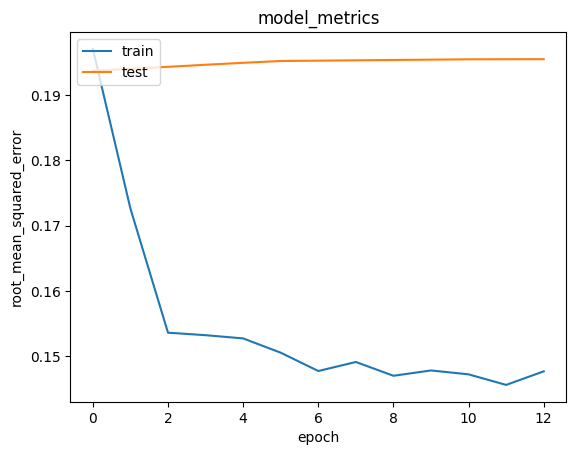

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()